In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

%load_ext autoreload
%autoreload 2

In [2]:
######### Read the data ##########

infile = open('faces.csv','r')
img_data = infile.read().strip().split('\n')
faces = np.genfromtxt('faces.csv',dtype = int, delimiter = ',')

In [3]:
######### Global Variable ##########

image_count = 0

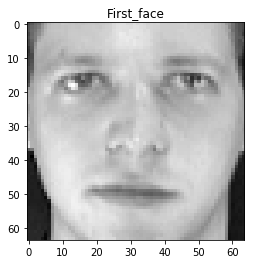

In [4]:
######### Display first face #########

# Useful functions:
# > numpy.reshape(a, newshape, order='C')
#   Gives a new shape to an array without changing its data.
# > matplotlib.pyplot.figure()
# 	Creates a new figure.
# > matplotlib.pyplot.title()
#	Set a title of the current axes.
# > matplotlib.pyplot.imshow()
#	Display an image on the axes.
#	Note: You need a matplotlib.pyplot.show() at the end to display all the figures.

first_face = np.reshape(faces[0],(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('First_face')
plt.imshow(first_face,cmap=plt.cm.gray)
plt.show()

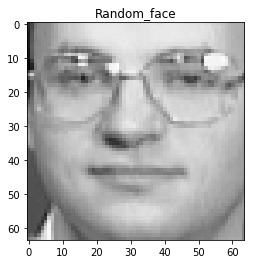

In [5]:
########## display a random face ###########

# Useful functions:
# > numpy.random.choice(a, size=None, replace=True, p=None)
#   Generates a random sample from a given 1-D array
# > numpy.ndarray.shape()
#   Tuple of array dimensions.

#### Your Code Here ####
face_index = np.random.choice(np.arange(faces.shape[0]))
random_face = np.reshape(faces[face_index],(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('Random_face')
plt.imshow(random_face,cmap=plt.cm.gray)
plt.show()

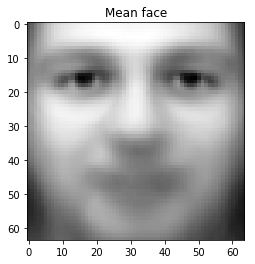

In [6]:
########## compute and display the mean face ###########

# Useful functions:
# > numpy.mean(a, axis='None', ...)
#   Compute the arithmetic mean along the specified axis.
#   Returns the average of the array elements. The average is taken over 
#   the flattened array by default, otherwise over the specified axis. 
#   float64 intermediate and return values are used for integer inputs.

#### Your Code Here ####
mean_face_vector = np.mean(faces,axis=0)
mean_face = np.reshape(mean_face_vector,(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('Mean face')
plt.imshow(mean_face,cmap=plt.cm.gray)
plt.show()

In [7]:
######### substract the mean from the face images and get the centralized data matrix A ###########

# Useful functions:
# > numpy.repeat(a, repeats, axis=None)
#   Repeat elements of an array.

#### Your Code Here ####
A = faces - mean_face_vector

In [8]:
A.shape

(400, 4096)

In [40]:
######### calculate the eigenvalues and eigenvectors of the covariance matrix #####################

# Useful functions:
# > numpy.matrix()
#   Returns a matrix from an array-like object, or from a string of data. 
#   A matrix is a specialized 2-D array that retains its 2-D nature through operations. 
#   It has certain special operators, such as * (matrix multiplication) and ** (matrix power).

# > numpy.matrix.transpose(*axes)
#   Returns a view of the array with axes transposed.

# > numpy.linalg.eig(a)[source]
#   Compute the eigenvalues and right eigenvectors of a square array.
#   The eigenvalues, each repeated according to its multiplicity. 
#   The eigenvalues are not necessarily ordered. 

#### Your Code Here ####
L = np.dot(A,A.T)
eigenvalues, v = LA.eig(L)
raw_eigenvectors = np.dot(A.T,v)
eigenvectors = raw_eigenvectors / LA.norm(raw_eigenvectors,axis=0)

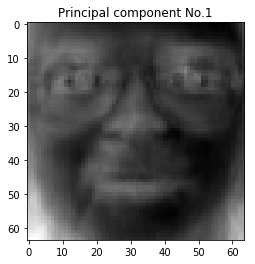

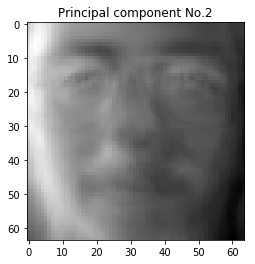

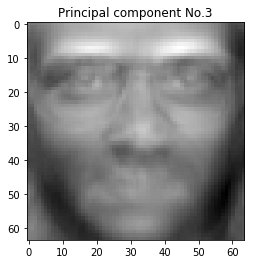

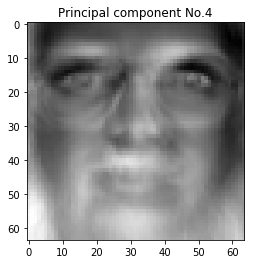

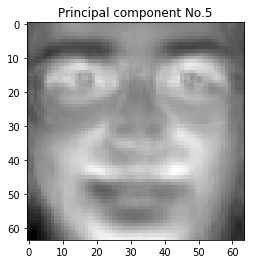

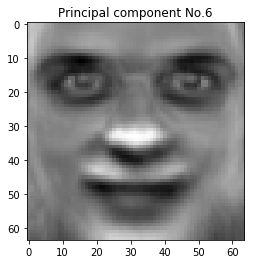

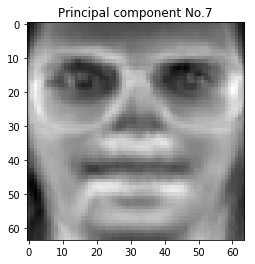

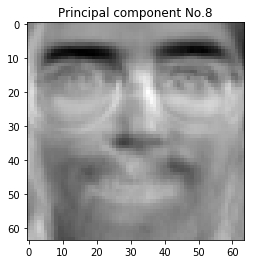

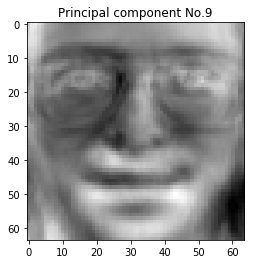

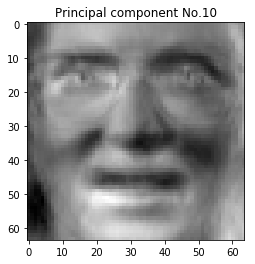

In [41]:
########## Display the first 10 principal components ##################

#### Your Code Here ####
indices = np.argsort(eigenvalues)[::-1][:10]
U = eigenvectors[:,indices]
for i in range(10):
    PCface = np.reshape(U[:,i],(64,64),order='F')
    image_count+=1
    plt.figure(image_count)
    plt.title('Principal component No.'+str(i+1))
    plt.imshow(PCface,cmap=plt.cm.gray)
    plt.show()

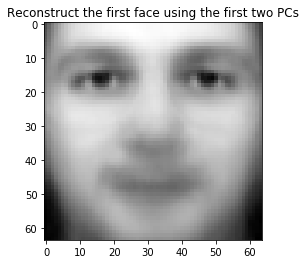

In [49]:
########## Reconstruct the first face using the first two PCs #########

#### Your Code Here ####
indices = np.argsort(eigenvalues)[::-1][:2]
U = eigenvectors[:,indices]
omega = np.dot(U.T,A[0,:])
reconstructed_faces_vector = mean_face_vector + np.dot(omega,U.T)
reconstructed_faces = np.reshape(reconstructed_faces_vector,(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('Reconstruct the first face using the first two PCs')
plt.imshow(reconstructed_faces,cmap=plt.cm.gray)
plt.show()

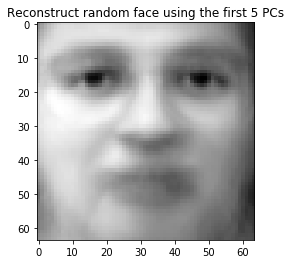

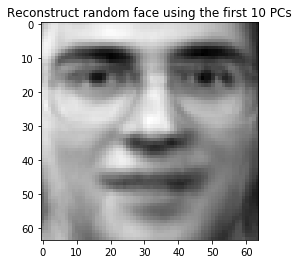

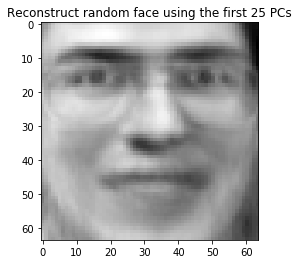

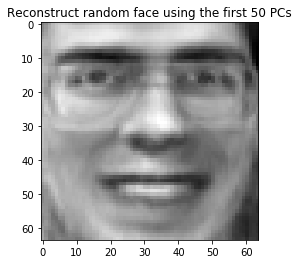

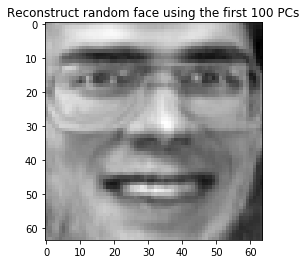

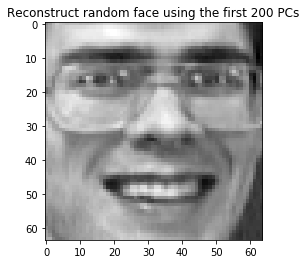

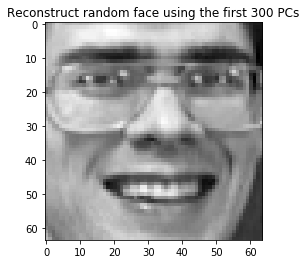

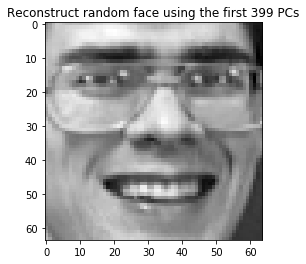

In [53]:
########## Reconstruct random face using the first 5, 10, 25, 50, 100, 200, 300, 399  PCs ###########

#### Your Code Here ####
PCs = [5, 10, 25, 50, 100, 200, 300, 399]
face_index = np.random.choice(np.arange(faces.shape[0]))
for PC in PCs:
    indices = np.argsort(eigenvalues)[::-1][:PC]
    U = eigenvectors[:,indices]
    omega = np.dot(U.T,A[face_index,:])
    reconstructed_faces_vector = mean_face_vector + np.dot(omega,U.T)
    reconstructed_faces = np.reshape(reconstructed_faces_vector,(64,64),order='F')
    image_count+=1
    plt.figure(image_count)
    plt.title('Reconstruct random face using the first %d PCs' % (PC,))
    plt.imshow(reconstructed_faces,cmap=plt.cm.gray)
    plt.show()

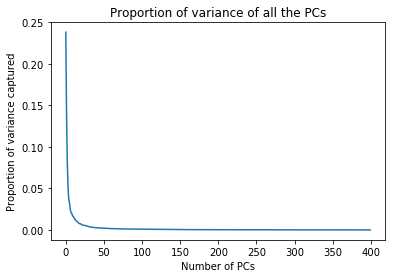

In [57]:
######### Plot proportion of variance of all the PCs ###############

# Useful functions:
# > matplotlib.pyplot.plot(*args, **kwargs)
#   Plot lines and/or markers to the Axes. 
# > matplotlib.pyplot.show(*args, **kw)
#   Display a figure. 
#   When running in ipython with its pylab mode, 
#   display all figures and return to the ipython prompt.

#### Your Code Here ####
eigen_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[eigen_indices]
sum_eigenvalues = np.sum(sorted_eigenvalues)
image_count+=1
plt.figure(image_count)
plt.plot(np.arange(sorted_eigenvalues.shape[0]),sorted_eigenvalues / sum_eigenvalues)
plt.xlabel("Number of PCs")
plt.ylabel("Proportion of variance captured")
plt.title("Proportion of variance of all the PCs")
plt.show()